In [8]:
set.seed(12345)

# librerias
library(portes)

In [9]:
# parametros
C <- 200
N <- 3
tt <- 500
phi <- c(0.5)
r <- length(phi)
gamma <- 1
eta <- 1 
a <- 1

if(r > 1){
    phi <- diag(phi)
}

Phi <- array(phi, dim = c(r, r, 1))
Gamma <- array(diag(rep(gamma, N)), dim = c(N, N, 1))

Sigma_eta <- diag(rep(eta, r))
Sigma_a <- diag(rep(a, N))

In [10]:
# @ simulamos el proceso

# factor comun
f <- varima.sim(list(ar = Phi), n = tt + C, k = r, sigma = Sigma_eta)
colnames(f) <- paste("y_",1:r,sep = "")

# error
e <- varima.sim(list(ar = Gamma), n = tt + C, k = N, sigma = Sigma_a)
colnames(e) <- paste("y_",1:N,sep = "")   

# matriz de pesos
P <- matrix(runif(r*N, 1, 2), r, N)

# series de tiempo
Y <- f%*%P + e

# series de tiempo
Y <- Y[-(1:C),]
f <- f[-(1:C),]

Warning message in InvertQ(ar):
“check stationary/invertibility condition !”


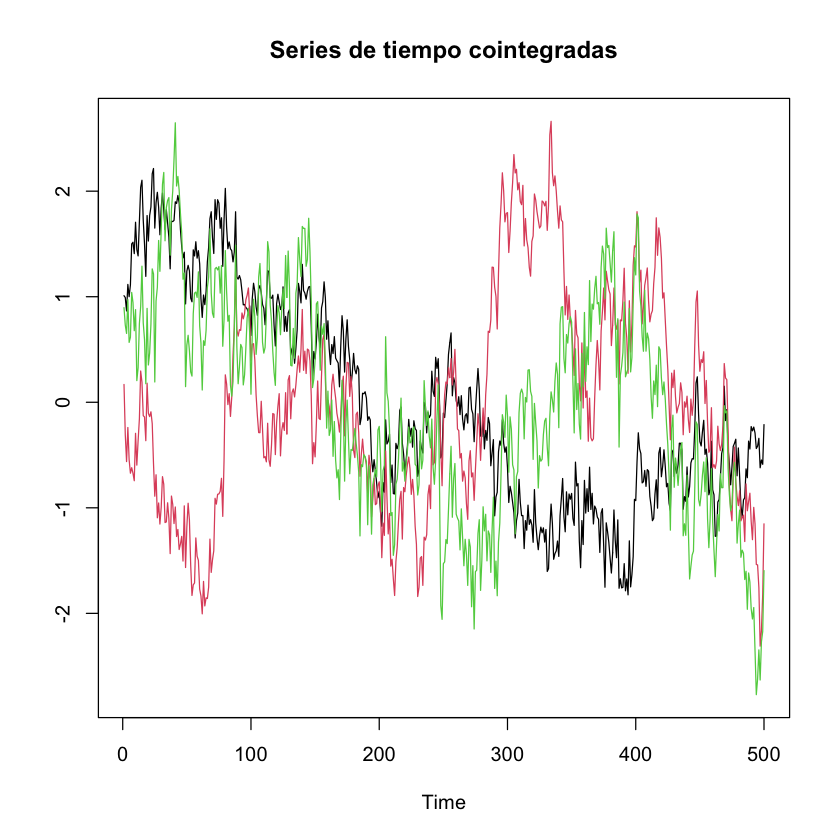

In [11]:
ts.plot(scale(Y), col = 1:N, main="Series de tiempo cointegradas")

In [12]:
library(vars)

In [13]:
cajo.articulo <- function (x, type = c("eigen", "trace"), ecdet = c("none", "const", 
    "trend"), K = 2, spec = c("longrun", "transitory"), season = NULL, 
    dumvar = NULL) 
{
    x <- as.matrix(x)
    colnames(x) <- make.names(colnames(x))
    type <- match.arg(type)
    ecdet <- match.arg(ecdet)
    spec <- match.arg(spec)
    K <- as.integer(K)
    if (K < 2) {
        stop("\nK must be at least K=2.\n")
    }
    P <- ncol(x)
    arrsel <- P
    N <- nrow(x)
    if (!is.null(season)) {
        s <- season - 1
    }
    else {
        s <- 0
    }
    if (N * P < P + s * P + K * P^2 + P * (P + 1)/2) 
        stop("\nInsufficient degrees of freedom.\n")
    if (P > 11) 
        warning("\nToo many variables, critical values cannot be computed.\n")
    if (NA %in% x) {
        idx.NA <- 1:N
        ind <- as.logical(sapply(idx.NA, function(z) sum(is.na(x[z, 
            ]) * 1)))
        ind2 <- ind * (1:N)
    }
    if (!(is.null(season))) {
        dum <- (diag(season) - 1/season)[, -season]
        dums <- dum
        while (nrow(dums) < N) {
            dums <- rbind(dums, dum)
        }
        dums <- dums[1:N, ]
        if (NA %in% x) {
            dums <- dums[-ind2, ]
        }
        colnames(dums) <- paste("sd", 1:ncol(dums), sep = "")
    }
    if (!(is.null(dumvar))) {
        dumvar <- as.matrix(dumvar)
        colnames(dumvar) <- make.names(colnames(dumvar))
        if (is.null(colnames(dumvar))) {
            dumcols <- ncol(dumvar)
            colnames(dumvar) <- paste("exo", 1:dumcols, sep = "")
            warning("\nNo column names in 'dumvar', using prefix 'exo' instead.\n")
        }
        if (!(nrow(dumvar) == nrow(x))) {
            stop("\nUnequal row length between dummy variables and x matrix.\n")
        }
        if (NA %in% x) {
            dumvar <- dumvar[-ind2, ]
        }
    }
    if (ecdet == "trend") {
        trend <- 1:nrow(x)
        if (NA %in% x) {
            trend <- trend[-ind2]
        }
    }
    x <- na.omit(x)
    N <- nrow(x)
    Z <- embed(diff(x), K)
    Z0 <- Z[, 1:P]
    cv.none <- array(c(6.5, 12.91, 18.9, 24.78, 30.84, 36.25, 
        42.06, 48.43, 54.01, 59, 65.07, 8.18, 14.9, 21.07, 27.14, 
        33.32, 39.43, 44.91, 51.07, 57, 62.42, 68.27, 11.65, 
        19.19, 25.75, 32.14, 38.78, 44.59, 51.3, 57.07, 63.37, 
        68.61, 74.36, 6.5, 15.66, 28.71, 45.23, 66.49, 85.18, 
        118.99, 151.38, 186.54, 226.34, 269.53, 8.18, 17.95, 
        31.52, 48.28, 70.6, 90.39, 124.25, 157.11, 192.84, 232.49, 
        277.39, 11.65, 23.52, 37.22, 55.43, 78.87, 104.2, 136.06, 
        168.92, 204.79, 246.27, 292.65), c(11, 3, 2))
    cv.const <- array(c(7.52, 13.75, 19.77, 25.56, 31.66, 37.45, 
        43.25, 48.91, 54.35, 60.25, 66.02, 9.24, 15.67, 22, 28.14, 
        34.4, 40.3, 46.45, 52, 57.42, 63.57, 69.74, 12.97, 20.2, 
        26.81, 33.24, 39.79, 46.82, 51.91, 57.95, 63.71, 69.94, 
        76.63, 7.52, 17.85, 32, 49.65, 71.86, 97.18, 126.58, 
        159.48, 196.37, 236.54, 282.45, 9.24, 19.96, 34.91, 53.12, 
        76.07, 102.14, 131.7, 165.58, 202.92, 244.15, 291.4, 
        12.97, 24.6, 41.07, 60.16, 84.45, 111.01, 143.09, 177.2, 
        215.74, 257.68, 307.64), c(11, 3, 2))
    cv.trend <- array(c(10.49, 16.85, 23.11, 29.12, 34.75, 40.91, 
        46.32, 52.16, 57.87, 63.18, 69.26, 12.25, 18.96, 25.54, 
        31.46, 37.52, 43.97, 49.42, 55.5, 61.29, 66.23, 72.72, 
        16.26, 23.65, 30.34, 36.65, 42.36, 49.51, 54.71, 62.46, 
        67.88, 73.73, 79.23, 10.49, 22.76, 39.06, 59.14, 83.2, 
        110.42, 141.01, 176.67, 215.17, 256.72, 303.13, 12.25, 
        25.32, 42.44, 62.99, 87.31, 114.9, 146.76, 182.82, 222.21, 
        263.42, 310.81, 16.26, 30.45, 48.45, 70.05, 96.58, 124.75, 
        158.49, 196.08, 234.41, 279.07, 327.45), c(11, 3, 2))
    if (ecdet == "none") {
        cvals <- cv.none
    }
    else if (ecdet == "const") {
        cvals <- cv.const
    }
    else if (ecdet == "trend") {
        cvals <- cv.trend
    }
    if (ecdet == "const") {
        if (spec == "longrun") {
            ZK <- cbind(x[-c((N - K + 1):N), ], 1)
            Lnotation <- K
        }
        else if (spec == "transitory") {
            ZK <- cbind(x[-N, ], 1)[K:(N - 1), ]
            Lnotation <- 1
        }
        colnames(ZK) <- c(paste(colnames(x), ".l", Lnotation, 
            sep = ""), "constant")
        Z1 <- Z[, -c(1:P)]
        temp1 <- NULL
        for (i in 1:(K - 1)) {
            temp <- paste(colnames(x), ".dl", i, sep = "")
            temp1 <- c(temp1, temp)
        }
        colnames(Z1) <- temp1
        P <- P + 1
        idx <- 0:(P - 2)
        model <- "without linear trend and constant in cointegration"
    }
    else if (ecdet == "none") {
        if (spec == "longrun") {
            ZK <- x[-c((N - K + 1):N), ]
            Lnotation <- K
        }
        else if (spec == "transitory") {
            ZK <- x[-N, ][K:(N - 1), ]
            Lnotation <- 1
        }
        colnames(ZK) <- paste(colnames(x), ".l", Lnotation, sep = "")
        Z1 <- Z[, -c(1:P)]
        Z1 <- cbind(1, Z1)
        temp1 <- NULL
        for (i in 1:(K - 1)) {
            temp <- paste(colnames(x), ".dl", i, sep = "")
            temp1 <- c(temp1, temp)
        }
        temp1 <- c("constant", temp1)
        colnames(Z1) <- temp1
        idx <- 0:(P - 1)
        model <- "with linear trend"
    }
    else if (ecdet == "trend") {
        if (spec == "longrun") {
            ZK <- cbind(x[-c((N - K + 1):N), ], trend[-c((N - 
                K + 1):N)])
            Lnotation <- K
        }
        else if (spec == "transitory") {
            ZK <- cbind(x[-N, ], trend[-N])[K:(N - 1), ]
            Lnotation <- 1
        }
        colnames(ZK) <- c(paste(colnames(x), ".l", Lnotation, 
            sep = ""), paste("trend.l", Lnotation, sep = ""))
        Z1 <- Z[, -c(1:P)]
        Z1 <- cbind(1, Z1)
        temp1 <- NULL
        for (i in 1:(K - 1)) {
            temp <- paste(colnames(x), ".dl", i, sep = "")
            temp1 <- c(temp1, temp)
        }
        temp1 <- c("constant", temp1)
        colnames(Z1) <- temp1
        P <- P + 1
        idx <- 0:(P - 2)
        model <- "with linear trend in cointegration"
    }
    N <- nrow(Z0)
    if (!(is.null(season))) {
        if (ecdet == "const") {
            Z1 <- cbind(dums[-(1:K), ], Z1)
        }
        else {
            Z1 <- cbind(Z1[, 1], dums[-(1:K), ], Z1[, -1])
            colnames(Z1) <- c("constant", colnames(Z1)[-1])
        }
    }
    if (!(is.null(dumvar))) {
        tmp <- colnames(Z1)
        if (ecdet == "const") {
            Z1 <- cbind(dumvar[-(1:K), ], Z1)
            colnames(Z1) <- c(colnames(dumvar), tmp)
        }
        else {
            Z1 <- cbind(Z1[, 1], dumvar[-(1:K), ], Z1[, -1])
            colnames(Z1) <- c("constant", colnames(dumvar), tmp[-1])
        }
    }
    M00 <- crossprod(Z0)/N
    M11 <- crossprod(Z1)/N
    MKK <- crossprod(ZK)/N
    M01 <- crossprod(Z0, Z1)/N
    M0K <- crossprod(Z0, ZK)/N
    MK0 <- crossprod(ZK, Z0)/N
    M10 <- crossprod(Z1, Z0)/N
    M1K <- crossprod(Z1, ZK)/N
    MK1 <- crossprod(ZK, Z1)/N
    M11inv <- solve(M11)
    R0 <- Z0 - t(M01 %*% M11inv %*% t(Z1))
    RK <- ZK - t(MK1 %*% M11inv %*% t(Z1))
    S00 <- M00 - M01 %*% M11inv %*% M10
    S0K <- M0K - M01 %*% M11inv %*% M1K
    SK0 <- MK0 - MK1 %*% M11inv %*% M10
    SKK <- MKK - MK1 %*% M11inv %*% M1K
    Ctemp <- chol(SKK, pivot = TRUE)
    pivot <- attr(Ctemp, "pivot")
    oo <- order(pivot)
    C <- t(Ctemp[, oo])
    Cinv <- solve(C)
    S00inv <- solve(S00)
    valeigen <- eigen(Cinv %*% SK0 %*% S00inv %*% S0K %*% t(Cinv))
    lambda <- valeigen$values
    e <- valeigen$vector
    V <- t(Cinv) %*% e
    Vorg <- V
    V <- sapply(1:P, function(x) V[, x]/V[1, x])
    W <- S0K %*% V %*% solve(t(V) %*% SKK %*% V)
    PI <- S0K %*% solve(SKK)
    DELTA <- S00 - S0K %*% V %*% solve(t(V) %*% SKK %*% V) %*% t(V) %*% SK0
    GAMMA <- M01 %*% M11inv - PI %*% MK1 %*% M11inv


    if (type == "trace") {
        type <- "trace statistic"
        teststat <- as.matrix(rev(sapply(idx, function(x) -N * 
            sum(log(1 - lambda[(x + 1):P])))))
        colnames(teststat) <- "trace"
        if (arrsel > 11) {
            cval <- NULL
        }
        else {
            cval <- round(cvals[1:arrsel, , 2], 2)
            colnames(cval) <- c("10pct", "5pct", "1pct")
            rownames(cval) <- c(paste("r <= ", (arrsel - 1):1, 
                " |", sep = ""), "r = 0  |")
        }
    }
    else if (type == "eigen") {
        type <- "maximal eigenvalue statistic (lambda max)"
        teststat <- as.matrix(rev(sapply(idx, function(x) -N * 
            log(1 - lambda[x + 1]))))
        colnames(teststat) <- "lambda max."
        if (arrsel > 11) {
            cval <- NULL
        }
        else {
            cval <- round(cvals[1:arrsel, , 1], 2)
            colnames(cval) <- c("10pct", "5pct", "1pct")
            rownames(cval) <- c(paste("r <= ", (arrsel - 1):1, 
                " |", sep = ""), "r = 0  |")
        }
    }

    ###-Obtenemos los valores de alfa y gamma estimadas-###
    r <- arrsel - 1
    alfa <- V[, c(1:r)]
    gamma <- S0K %*% alfa
    matriz_alfa <- alfa %*% t(alfa)
    eivec_matriz_alfa <- eigen(matriz_alfa)$vector
    alfa_co <- eivec_matriz_alfa[, c((r+1):ncol(eivec_matriz_alfa))]

    ###-Obtenemos gamma complemento ortogonal-----------###

    Ctemp_g <- chol(S00, pivot = TRUE)
    pivot_g <- attr(Ctemp_g, "pivot")
    oo_g <- order(pivot_g)
    C_g <- t(Ctemp_g[, oo_g])
    Cinv_g <- solve(C_g)
    SKKinv <- solve(SKK)
    valeigen_g <- eigen(Cinv_g %*% S0K %*% SKKinv %*% SK0 %*% t(Cinv_g))
    lambda_g <- valeigen_g$values
    e_g <- valeigen_g$vectors
    M <- t(Cinv_g) %*% e_g
    gamma_co <- M[, c((r+1):ncol(M))]

    ###-Obtenemos las matrices A1 y A2, para la descomposicion P-T-###

    A1 <- alfa_co %*% solve( t(gamma_co) %*% alfa_co )
    A2 <- gamma %*% solve( t(alfa) %*% gamma )

    P_d <- x %*% ( A1 %*% t(gamma_co) )
    T_d <- x %*% ( A2 %*% t(alfa) )
    xt <- P_d + T_d

    ###
    
    # Definir las series de tiempo y sus componentes
    series <- list(xt, P_d, T_d)  # Asegúrate de que xt, P_d, T_d estén en la misma lista y tengan la misma dimensión

    # Graficar cada serie en un solo gráfico
    par(mfrow = c(2, 2))  # Organiza en 2x2 (puedes cambiar esto según la cantidad de series que tengas)
    for (i in 1:ncol(xt)) {
        # Crear el gráfico principal con xt[,i]
        plot(xt[,i], type = "l", col = "black", xlab = "Tiempo", ylab = "Valores", 
            main = paste("Descomposición P-T de la serie", i), 
            ylim = range(c(xt[,i], P_d[,i], T_d[,i])))  # Ajusta el rango para todas las series

        # Agregar las otras series usando lines
        lines(P_d[,i], col = "blue")
        lines(T_d[,i], col = "red")

        # Añadir una leyenda para identificar cada serie
        legend("topright", legend = c("X", "P", "T"), col = c("black", "blue", "red"), lty = 1)
    }

    # Restaurar la configuración de gráficos
    par(mfrow = c(1, 1))

    ###-------------------------------------------------###
    
    colnames(V) <- colnames(ZK)
    rownames(V) <- colnames(ZK)
    rownames(W) <- paste(colnames(x), ".d", sep = "")
    colnames(W) <- colnames(ZK)
    colnames(Vorg) <- colnames(V)
    rownames(Vorg) <- rownames(V)
    rownames(PI) <- rownames(W)
    colnames(PI) <- colnames(W)
    colnames(Z0) <- paste(colnames(x), ".d", sep = "")
    colnames(R0) <- paste("R0", colnames(Z0), sep = ".")
    colnames(RK) <- paste("RK", colnames(ZK), sep = ".")
    rownames(GAMMA) <- rownames(W)
    new("ca.jo", x = x, Z0 = Z0, Z1 = Z1, ZK = ZK, type = type, 
        model = model, ecdet = ecdet, lag = K, P = arrsel, season = season, 
        dumvar = dumvar, cval = cval, teststat = as.vector(teststat), 
        lambda = lambda, Vorg = Vorg, V = V, W = W, PI = PI, 
        DELTA = DELTA, GAMMA = GAMMA, R0 = R0, RK = RK, bp = NA,
        test.name = "Johansen-Procedure", spec = spec, call = match.call())
}

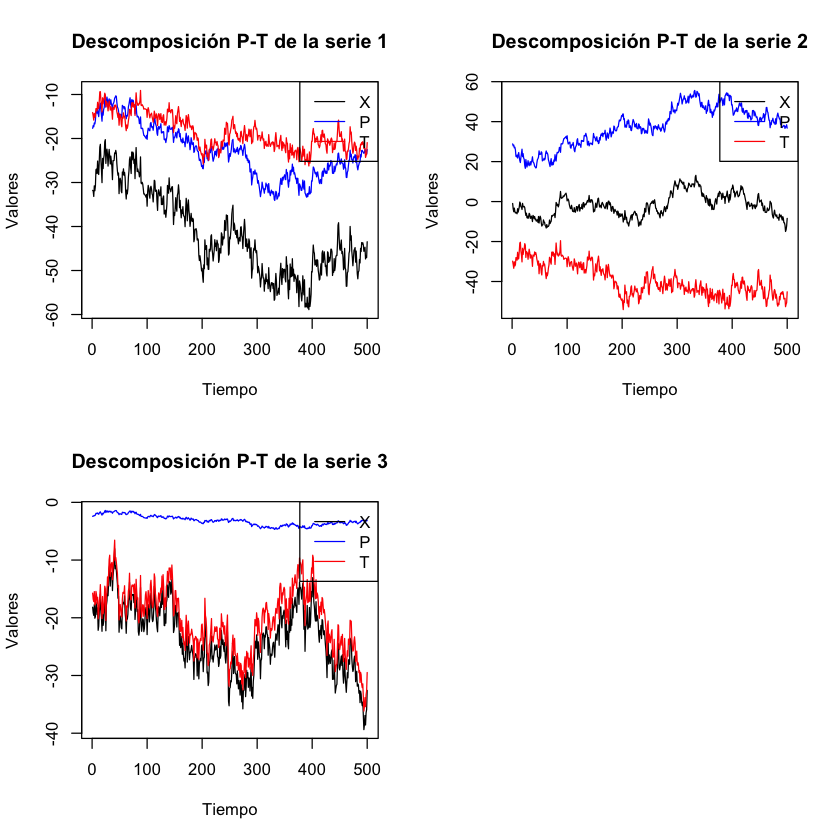

In [14]:
# Convertimos Y a data frame para analizarlo
Y <- as.data.frame(Y)
# Aplicamos el test de Johansen usando ca.jo
result <- cajo.articulo(Y, type = "trace", K = 2, ecdet = "none", spec = "transitory")